In [1]:
! mkdir ~/.kaggle
! cp /content/kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
! kaggle datasets download -d pcbreviglieri/smart-grid-stability

  0% 0.00/6.30M [00:00<?, ?B/s]
100% 6.30M/6.30M [00:00<00:00, 73.3MB/s]


In [3]:
! unzip /content/smart-grid-stability.zip

Archive:  /content/smart-grid-stability.zip
  inflating: smart_grid_stability_augmented.csv  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tqdm 
import seaborn as sn
from sklearn import metrics, preprocessing, model_selection

# Read the Data

In [5]:
dataset = pd.read_csv('/content/smart_grid_stability_augmented.csv')
dataset 

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2.930406,2.376523,9.487627,6.187797,3.343416,-1.449106,-0.658054,-1.236256,0.601709,0.813512,0.779642,0.608385,0.023892,unstable
59996,3.392299,2.954947,1.274827,6.894759,4.349512,-0.952437,-1.663661,-1.733414,0.502079,0.285880,0.567242,0.366120,-0.025803,stable
59997,2.364034,8.776391,2.842030,1.008906,4.299976,-0.943884,-1.380719,-1.975373,0.487838,0.149286,0.986505,0.145984,-0.031810,stable
59998,9.631511,2.757071,3.994398,7.821347,2.514755,-0.649915,-0.966330,-0.898510,0.365246,0.889118,0.587558,0.818391,0.037789,unstable


In [6]:
# drop the stab column
dataset.drop(columns=['stab'],inplace=True)

In [7]:
# show the dataset information 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    60000 non-null  float64
 1   tau2    60000 non-null  float64
 2   tau3    60000 non-null  float64
 3   tau4    60000 non-null  float64
 4   p1      60000 non-null  float64
 5   p2      60000 non-null  float64
 6   p3      60000 non-null  float64
 7   p4      60000 non-null  float64
 8   g1      60000 non-null  float64
 9   g2      60000 non-null  float64
 10  g3      60000 non-null  float64
 11  g4      60000 non-null  float64
 12  stabf   60000 non-null  object 
dtypes: float64(12), object(1)
memory usage: 6.0+ MB


# Preprocessing the Dataset 

In [8]:
# drop the na values 
dataset.dropna(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 59999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    60000 non-null  float64
 1   tau2    60000 non-null  float64
 2   tau3    60000 non-null  float64
 3   tau4    60000 non-null  float64
 4   p1      60000 non-null  float64
 5   p2      60000 non-null  float64
 6   p3      60000 non-null  float64
 7   p4      60000 non-null  float64
 8   g1      60000 non-null  float64
 9   g2      60000 non-null  float64
 10  g3      60000 non-null  float64
 11  g4      60000 non-null  float64
 12  stabf   60000 non-null  object 
dtypes: float64(12), object(1)
memory usage: 6.4+ MB


In [9]:
dataset

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2.930406,2.376523,9.487627,6.187797,3.343416,-1.449106,-0.658054,-1.236256,0.601709,0.813512,0.779642,0.608385,unstable
59996,3.392299,2.954947,1.274827,6.894759,4.349512,-0.952437,-1.663661,-1.733414,0.502079,0.285880,0.567242,0.366120,stable
59997,2.364034,8.776391,2.842030,1.008906,4.299976,-0.943884,-1.380719,-1.975373,0.487838,0.149286,0.986505,0.145984,stable
59998,9.631511,2.757071,3.994398,7.821347,2.514755,-0.649915,-0.966330,-0.898510,0.365246,0.889118,0.587558,0.818391,unstable


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87b014e910>,
      dtype=object)

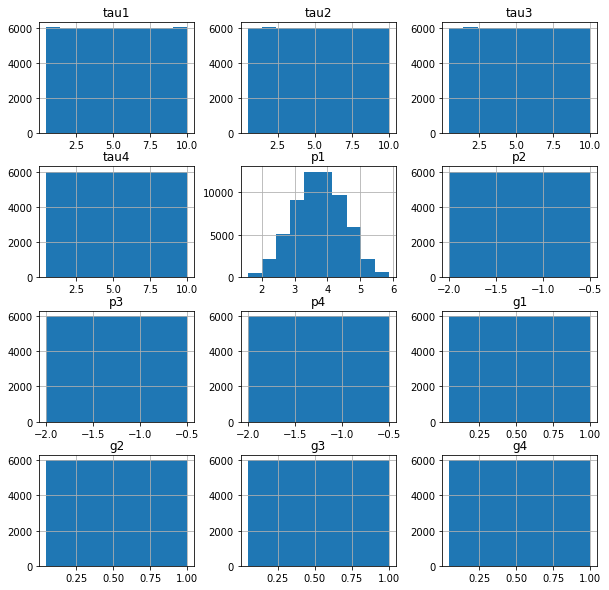

In [10]:
# plot the histogram 
dataset.hist(figsize=(10,10))

In [11]:
dataset.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,5.250000,5.250001,5.250001,5.250001,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000
std,2.742434,2.742437,2.742437,2.742437,0.752129,0.433017,0.433017,0.433017,0.274244,0.274243,0.274243,0.274243
min,0.500793,0.500141,0.500141,0.500141,1.582590,-1.999945,-1.999945,-1.999945,0.050009,0.050028,0.050028,0.050028
25%,2.874892,2.875011,2.875011,2.875011,3.218300,-1.624997,-1.624997,-1.624997,0.287521,0.287497,0.287497,0.287497
50%,5.250004,5.249981,5.249981,5.249981,3.751025,-1.249996,-1.249996,-1.249996,0.525009,0.525007,0.525007,0.525007
75%,7.624690,7.624896,7.624896,7.624896,4.282420,-0.874993,-0.874993,-0.874993,0.762435,0.762490,0.762490,0.762490
max,9.999469,9.999837,9.999837,9.999837,5.864418,-0.500025,-0.500025,-0.500025,0.999937,0.999982,0.999982,0.999982


In [12]:
dataset

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2.930406,2.376523,9.487627,6.187797,3.343416,-1.449106,-0.658054,-1.236256,0.601709,0.813512,0.779642,0.608385,unstable
59996,3.392299,2.954947,1.274827,6.894759,4.349512,-0.952437,-1.663661,-1.733414,0.502079,0.285880,0.567242,0.366120,stable
59997,2.364034,8.776391,2.842030,1.008906,4.299976,-0.943884,-1.380719,-1.975373,0.487838,0.149286,0.986505,0.145984,stable
59998,9.631511,2.757071,3.994398,7.821347,2.514755,-0.649915,-0.966330,-0.898510,0.365246,0.889118,0.587558,0.818391,unstable


In [13]:
dataset.iloc[0]

tau1      2.95906
tau2     3.079885
tau3     8.381025
tau4     9.780754
p1       3.763085
p2      -0.782604
p3      -1.257395
p4      -1.723086
g1       0.650456
g2       0.859578
g3       0.887445
g4       0.958034
stabf    unstable
Name: 0, dtype: object

In [14]:

dataset.stabf=dataset.stabf.factorize()[0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87afb52dd0>,
      dtype=object)

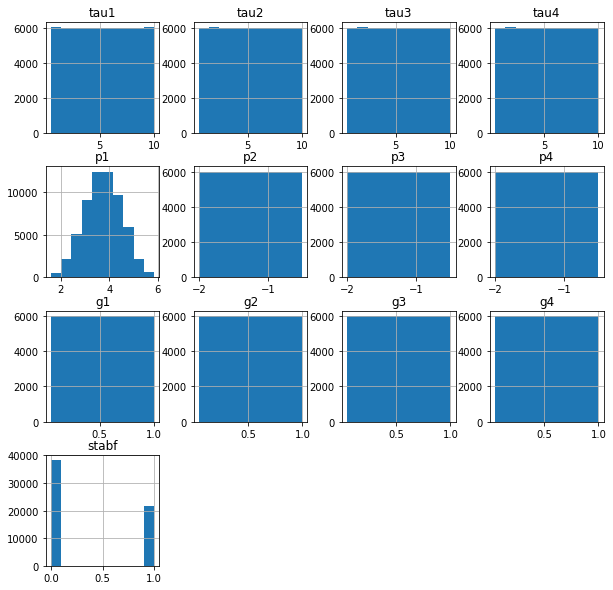

In [15]:
# plot the histogram 
dataset.hist(figsize=(10,10))

In [16]:
new_dataset=dataset[dataset.stabf==1].iloc[:5000,:]
new_dataset = new_dataset.append(dataset[dataset.stabf==0].sample(n=len(new_dataset.stabf)))
new_dataset

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,1
8,4.689852,4.007747,1.478573,3.733787,4.041300,-1.410344,-1.238204,-1.392751,0.269708,0.250364,0.164941,0.482439,1
10,5.930110,6.730873,6.245138,0.533288,2.327092,-0.702501,-1.116920,-0.507671,0.239816,0.563110,0.164461,0.753701,1
12,1.616787,2.939228,0.819791,4.191804,3.752282,-1.484885,-1.280581,-0.986816,0.899698,0.866546,0.303921,0.077610,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6888,8.409924,5.598573,5.914964,3.337329,4.915936,-1.953453,-1.014358,-1.948125,0.630852,0.257969,0.801481,0.525231,0
44771,4.270693,9.832367,1.870253,5.713898,4.638713,-1.342855,-1.855466,-1.440391,0.806855,0.785704,0.648556,0.510247,0
23454,5.312771,9.313984,5.598046,8.067365,3.873806,-1.117613,-0.935181,-1.821013,0.556648,0.696745,0.617441,0.933072,0
44549,9.629134,4.028003,9.372776,6.449427,4.037361,-0.895776,-1.850551,-1.291034,0.646297,0.663989,0.244854,0.541195,0


In [17]:
# split the data to features and labels 
x=new_dataset.iloc[:,:-1]
y=new_dataset.iloc[:,-1]

In [18]:
# scale the feature values between 0,1
min_max_preprocess =preprocessing.StandardScaler()
min_max_preprocess.fit(x)
x_norm=min_max_preprocess.transform(x)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87af08fb10>,
      dtype=object)

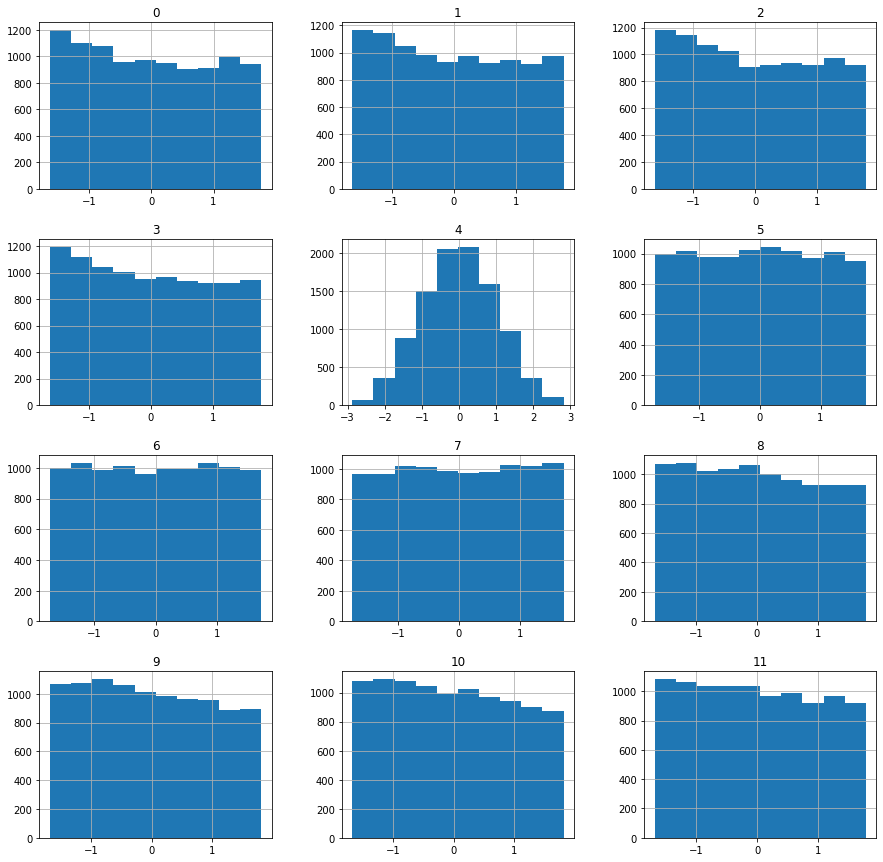

In [19]:
pd.DataFrame(x_norm).hist(figsize=(15,15))

(array([5000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5000.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

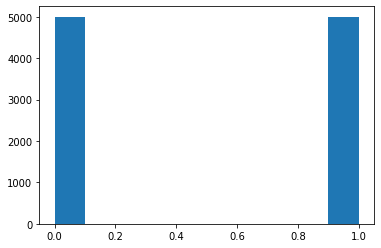

In [20]:
plt.hist(y)

# Spilt the Data to Train & Test 

In [21]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x_norm,y,test_size=0.1,random_state=42,stratify=y)

# Create the Data Pipeline

In [22]:
# creat the data pipeline
def data_pipeline(x,y,batch_size=32):
    # insert the data to the data pipeline
    data=tf.data.Dataset.from_tensor_slices((x,y))
    data=data.shuffle(50000)# shuffle the data
    data=data.batch(batch_size)# creat the batch
    data=data.prefetch(tf.data.AUTOTUNE)# run the data processing and training in parallel 
    return data

In [23]:
# create the train pipeline 
train_dataset=data_pipeline(x_train,y_train)
# create the test pipeline
test_dataset=data_pipeline(x_test,y_test)

In [24]:
# get the first batch of data from the train pipeline 
for x,y in train_dataset.take(1):
    print(x)
    print(y)

tf.Tensor(
[[ 1.58193286e+00 -1.21578960e+00 -1.36440494e+00 -5.94385597e-01
  -7.23129597e-03  1.47062808e+00 -1.19468616e+00 -2.52169366e-01
   3.86388364e-03  1.42417057e+00  4.65707373e-01 -2.99901420e-01]
 [ 1.30509483e+00 -4.50020222e-01  2.31202110e-01 -1.30968555e+00
   1.33239166e+00 -7.79957950e-01 -1.66613154e+00  1.29825407e-01
   1.74073697e+00  6.30894209e-01 -1.28015168e+00  1.66931536e+00]
 [-1.38908228e+00  1.00942403e+00  1.70829825e-03  1.30904520e+00
   1.35223531e-01 -1.10472736e+00  1.13840378e+00 -2.76999321e-01
  -1.87665818e-01  3.55243578e-01 -9.04175631e-01 -1.15888427e+00]
 [-2.33986839e-02  3.30866774e-01  1.33308671e+00 -7.08742749e-01
  -5.76329524e-01  8.35869214e-01  6.25605030e-01 -4.56038616e-01
   1.64507708e+00 -3.94067361e-01  1.11649755e+00  6.62034337e-01]
 [-2.20012296e-01 -1.05043612e+00  1.39311095e+00  5.36106562e-01
   8.29039753e-01 -1.64898948e+00 -1.24105813e+00  1.44096214e+00
  -3.88644270e-02  1.57627835e-01 -3.87821037e-01 -3.55915636

# Model

In [25]:
class Model(tf.keras.Model):
    def __init__(self):
        super(Model,self).__init__()
        self.D1=tf.keras.layers.Dense(32,activation=tf.nn.leaky_relu,kernel_regularizer=tf.keras.regularizers.L1())
        self.D2=tf.keras.layers.Dense(64,activation=tf.nn.leaky_relu,kernel_regularizer=tf.keras.regularizers.L1())
        self.D3=tf.keras.layers.Dense(128,activation=tf.nn.leaky_relu,kernel_regularizer=tf.keras.regularizers.L1())
        self.D4=tf.keras.layers.Dense(64,activation=tf.nn.leaky_relu,kernel_regularizer=tf.keras.regularizers.L1())
        self.out=tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)
    def call(self,x ):
        x=self.D1(x)
        x=self.D2(x)
        x=self.D3(x)
        x=self.D4(x)
        out = self.out(x)
        return out


In [26]:
model=Model()
model.build(input_shape=(None,12))

In [27]:
# compile the model an using adam optimizer with Categorical crossentropy cost function
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.BinaryCrossentropy(),
    metrics=['acc'],
)
# train the model with batch_size=32,for 100 epochs
model.fit(train_dataset, epochs=20, validation_data=test_dataset)

Epoch 1/20
282/282 [==============================] - 6s 4ms/step - loss: 4.9628 - acc: 0.5156 - val_loss: 0.7658 - val_acc: 0.5000
Epoch 2/20
282/282 [==============================] - 1s 3ms/step - loss: 0.7223 - acc: 0.4944 - val_loss: 0.7157 - val_acc: 0.5000
Epoch 3/20
282/282 [==============================] - 1s 3ms/step - loss: 0.7159 - acc: 0.4947 - val_loss: 0.7156 - val_acc: 0.5000
Epoch 4/20
282/282 [==============================] - 1s 3ms/step - loss: 0.7157 - acc: 0.4984 - val_loss: 0.7156 - val_acc: 0.5000
Epoch 5/20
282/282 [==============================] - 1s 3ms/step - loss: 0.7156 - acc: 0.5031 - val_loss: 0.7158 - val_acc: 0.5000
Epoch 6/20
282/282 [==============================] - 1s 3ms/step - loss: 0.7157 - acc: 0.5056 - val_loss: 0.7155 - val_acc: 0.5000
Epoch 7/20
282/282 [==============================] - 1s 3ms/step - loss: 0.7156 - acc: 0.4949 - val_loss: 0.7157 - val_acc: 0.5000
Epoch 8/20
282/282 [==============================] - 1s 3ms/step - loss: 0.

# Model Evaluation 

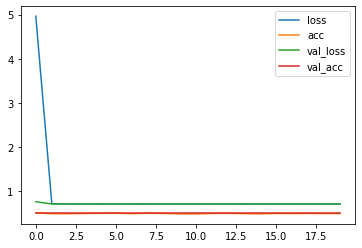

In [28]:
pd.DataFrame(model.history.history).plot()

In [29]:
preds=np.array([])
ys=np.array([])
for x,y in tqdm.tqdm(test_dataset):
    pred = model.predict(x)
    preds=np.append(preds,pred)
  
    ys=np.append(ys,y)
    
    
    
    

100%|██████████| 32/32 [00:01<00:00, 26.57it/s]


In [30]:
 preds = preds>0.5
 preds=preds.astype(int)

accuracy_score: 0.5
precision_score: 0.5
recall_score: 1.0
f1_score: 0.6666666666666666


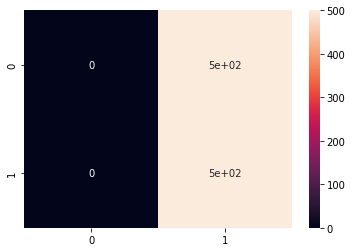

In [31]:
accuracy_score=metrics.accuracy_score(y_true=ys,y_pred=preds)
precision_score=metrics.precision_score(ys,preds)
recall_score=metrics.recall_score(ys,preds,)
f1_score=metrics.f1_score(ys,preds)
confion_metrix=metrics.confusion_matrix(ys,preds)
print('accuracy_score:',accuracy_score)
print('precision_score:',precision_score)
print('recall_score:',recall_score)
print('f1_score:',f1_score)

sn.heatmap(confion_metrix,annot=True)
